# A - What is Data Science

## A.1 From Raw Data &rarr; Insight &rarr; Decision

This lab will practice the simplest complete loop in data science: 
* Take a small table of raw data
* Compute a useful metric **(ROI)**
* Summarize it into a short insight **(average vs recent ROI)**
* Turn that into a concrete action using the **decision rule** (a threshold)

Experiment by editing the last week or two of `revenue` and `ad_spend`, changing the `threshold`, or switching the "recent" from the last 2 weeks to the last 3-4 weeks. Watch how small changes in assumptions can flip the recommended action.

<div style="border: 1px solid #ccc; padding: 10px; border-radius: 5px;">
    <b>Rule of thumb</b> <br> 
    <span style="color:blue">Value of analysis $\approx$ (decision improvement) - (time/compute/org cost)</span>
</div>

In [1]:
import pandas as pd

df = pd.DataFrame({
    "week": [1,2,3,4,5,6],
    "ad_spend": [200, 220, 240, 260, 260, 280],
    "revenue":  [900, 930, 950, 980, 970, 1030],
})

df["roi"] = (df["revenue"] - df["ad_spend"]) / df["ad_spend"]

print("Data:")
print(df)

avg_roi = df["roi"].mean()
recent_roi = df.tail(2)["roi"].mean()

threshold = 2.5
decision = "INCREASE ad spend" if recent_roi >= threshold else "HOLD ad spend"

print ("\nAverage ROI:", round(avg_roi, 3))
print ("Recent ROI (last 2 weeks):", round(recent_roi, 3))
print ("Threshold:", threshold)
print ("Decision:", decision)

Data:
   week  ad_spend  revenue       roi
0     1       200      900  3.500000
1     2       220      930  3.227273
2     3       240      950  2.958333
3     4       260      980  2.769231
4     5       260      970  2.730769
5     6       280     1030  2.678571

Average ROI: 2.977
Recent ROI (last 2 weeks): 2.705
Threshold: 2.5
Decision: INCREASE ad spend


### Questions


* What is the **decision** (what could change)?  
    <span style="color:blue">The decision is the amount spent for each advertisement. It is based on the `threshold`</span>
  
* What is the **metric** that will be used as evidence?  
    <span style="color:blue">For the evidence, I will look at the Return on Investment (ROI). Specifically `avg_roi`</span>

* What is the **rule** that would trigger a different action?  
    <span style="color:blue">The `decision` is where a different action will trigger. If the recent ROI is greater than or equal to the threshold then increase advertisement spending, otherwise hold advertisement spending.</span>

## A.2 Exploratory vs Predictive vs Presriptive

| Mode | Core Question | Typical Outputs | Common Pitfalls |
| :--- | :--- | :--- | :--- |  
| Exploratory | "What's going on in the data?" | Summaries, plots, anomalies, hypothesis | Seeing patterns that aren't real; correlation $\neq$ causation |
| Predictive | "What will happen next?" | Forecasts, classifications, risk scores | Leakage, overfitting, evaluation on the wrong data |
| Prescriptive | "What should we do?" | Policies, optimizations, recommended actions | Optimizing the wrong objective; ignoring constraints/incentives | 


This section shows how the same dataset can lead to three different **next steps** depending on the question, following this path
* **Exploratory**: describe what is happening
* **Predictive**: Fit a simple model and forecast signups for new spend levels
* **Prescriptive**: Choose a spend level that maximizes a defined objective

**Experiment:**  
* Make the relationship noisier by changing a few `signups` values
* Add an outlier day with unusually high spend
* Change `value_per_signup` to see how the "best" action shifts

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

df = pd.DataFrame({
    "day": np.arange(1, 11),
    "spend": [50, 60, 65, 70, 60, 80, 85, 90, 95, 100],
    "signups": [20, 22, 24, 25, 23, 28, 30, 32, 33, 35],
})

print("=== exploratory (describe what is going on) ===")
print(df.describe())

X = df[["spend"]].values
y = df["signups"].values
model = LinearRegression().fit(X, y)

print("\n=== Predictive (estimate what will happen) ===")
print("Estimated signups = {:.3f} * spend + {:.3f}".format(model.coef_[0], model.intercept_))
for test_spend in [70, 110]:
    pred = model.predict([[test_spend]])[0]
    print(f"Predicted signups at spend={test_spend}: {pred:.2f}")

print("\n=== Prescriptive (choose an action) ===")
value_per_signup = 3.0
candidate_spend = np.arange(40, 141, 5)
pred_signups = model.predict(candidate_spend.reshape(-1,1))
profit = value_per_signup * pred_signups - candidate_spend

best_idx = int(np.argmax(profit))
best_spend = int(candidate_spend[best_idx])
best_profit = float(profit[best_idx])

print("Assuming value_per_signup =", value_per_signup)
print("Best spend (grid search):", best_spend)
print("Expected profit at best spend:", round(best_profit, 2))


=== exploratory (describe what is going on) ===
            day       spend    signups
count  10.00000   10.000000  10.000000
mean    5.50000   75.500000  27.200000
std     3.02765   16.906606   5.138093
min     1.00000   50.000000  20.000000
25%     3.25000   61.250000  23.250000
50%     5.50000   75.000000  26.500000
75%     7.75000   88.750000  31.500000
max    10.00000  100.000000  35.000000

=== Predictive (estimate what will happen) ===
Estimated signups = 0.303 * spend + 4.337
Predicted signups at spend=70: 25.53
Predicted signups at spend=110: 37.65

=== Prescriptive (choose an action) ===
Assuming value_per_signup = 3.0
Best spend (grid search): 40
Expected profit at best spend: 9.35


### Analysis

* What happens when I add an outlier:  
    <span style="color:blue">The expected profit at best spend changes significantly. I believe this is because the dataset is quite small.</span>

* What happens when I change the value per signup:
    <span style="color:blue">It modifies the best spend</span>

# B - The Data Science Lifecycle

There are 5 recurring phases in the data science lifecycle:
* Problem Framing
* Data Collection
* Modeling
* Evaluation
* Deployment & Iteration

## B.1 - Problem Framing

We need to determine what "better" means and how the decision will be made.  
This framing produces
* **Decision**: What action could change?
* **Target**: What are we trying to predict / estimate / optimize?
* **Metric**: How will we measure success?
* **Constraints**: What limits are real (budget, latency, fairness, policy)?

<div style="border: 1px solid #ccc; padding: 10px; border-radius: 5px;">
    <b>Rule of thumb</b> <br> 
    <span style="color:blue">Bad framing &rarr; perfect model on the wrong question </span>
</div>

### Micro-lab - Turn a vague goal into a measurable plan

This lab takes a fuzzy business goal (like "improve retention") and turns it into a decision, measurable target, and a success metric. Then sanity-check whether an intervention is worth doing.

In [6]:
# Fill these in like you are writing a one-paragraph project brief.

goal = "Improve weekly retention"
decision = "Offer a discount to at-risk users? (yes/no)"
target = "Probability a user returns next week"
metric = "Incremental retained users (or incremental profit)"
constraints = ["Discount budget is capped", "Must be explainable to stakeholders"]

print("GOAL:", goal)
print("DECISION:", decision)
print("TARGET:", target)
print("METRIC:", metric)
print("CONSTRAINTS", constraints)

print("\n--- Quick sanity check: expected value ---")
n_users = 10_000

# Baseline retention and expected lift from intervention:
baseline_retention = 0.20
expected_lift = 0.03  # +3 percentage points

# Value per retained user and cost per targeted user:
# These values can be modified for testing
value_per_retained = 12.0
cost_per_user = 1.5

expected_retained = n_users * (baseline_retention + expected_lift)
baseline_retained = n_users * baseline_retention
incremental_retained = expected_retained - baseline_retained

benefit = incremental_retained * value_per_retained
cost = n_users * cost_per_user
net = benefit - cost

print("Incremental retained users:", int(incremental_retained))
print("Estimated benefit ($):", round(benefit, 2))
print("Estimated cost ($):", round(cost, 2))
print("Estimated net ($):", round(net, 2))
print("Decision suggestion:", "TRY IT" if net > 0 else "DON'T TRY IT (as framed)")


GOAL: Improve weekly retention
DECISION: Offer a discount to at-risk users? (yes/no)
TARGET: Probability a user returns next week
METRIC: Incremental retained users (or incremental profit)
CONSTRAINTS ['Discount budget is capped', 'Must be explainable to stakeholders']

--- Quick sanity check: expected value ---
Incremental retained users: 300
Estimated benefit ($): 3600.0
Estimated cost ($): 15000.0
Estimated net ($): -11400.0
Decision suggestion: DON'T TRY IT (as framed)


## B2 - Data Collection

**Match data to the decision**  
Collection is deciding what evidence is needed, how it will be recorded, and whether it represents the real world.

* **Sources**: logs, product events, CRM, surveys, third parties
* **Granularity**:row = user, session, transaction, day, etc.
* **Time**: what counts as "before" vs "after" the decision?
* **Quality**: missingness, measurement error, label noise

## B3 - Modeling

A model is a tool for turning inputs into an estimate that supports a decision.  

A model includes:
* **Baseline**: a simple benchmark (rules, averages, heuristics)
* **Features**: what signals will be used
* **Algorithm**: linear models, trees, clustering, etc
* **Training**: how the model learns from examples

## B4 - Evaluation

Evaluation it is proven that the model helps on new data - *not just the data that was previously seen*

**Trying to prevent**
* **Overfitting**: doing well on training data, failing in reality
* **Leakage**: accidentally using information from the "future"
* **Wrong metric**: optimizing accuracy when cost is asymmetric

### Microlab - Why we split data

This lab demonstrates a common evaluation mistake. First the model is trained, then evaluated on the same data it just saw.  
This usually looks better than reality because the model is being graded on the answers it learned from.

The second part will be the corrected version:
* Split into train and test
* Fit on the training set only
* Evaluate on the held-out test set

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Synthetic data: y is roughly 2x + noise
rng = np.random.default_rng(0)
n = 200
X = rng.uniform(0, 10, size=(n, 1))
noise = rng.normal(0, 2.0, size=n)  # change the noise for testing
y = 2.0 * X[:, 0] + 5.0 + noise

print("=== WRONG EVALUATION: train on ALL data, evaluate on the SAME data ===")
wrong_model = LinearRegression().fit(X, y)
pred_same = wrong_model.predict(X)
mae_same = mean_absolute_error(y, pred_same)

print("Model: y = {:.3f} * x + {:.3f}".format(wrong_model.coef_[0], wrong_model.intercept_))
print("MAE (evaluated on training data):", round(mae_same, 3))

print("\n=== RIGHT EVALUATION: train/test split, evaluate on HELD-OUT test data ===")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

right_model = LinearRegression().fit(X_train, y_train)
pred_train = right_model.predict(X_train)
pred_test = right_model.predict(X_test)

mae_train = mean_absolute_error(y_train, pred_train)
mae_test = mean_absolute_error(y_test, pred_test)

print("Model: y = {:.3f} * x + {:.3f}".format(right_model.coef_[0], right_model.intercept_))
print("Train MAE:", round (mae_train, 3))
print("Test MAE (the one you trust):", round (mae_test, 3))

print("\nTry:")
print("- Increase noise")
print("- Reduce n (e.g., n = 50)")
print("- Change test_size (e.g., 0.1 vs 0.4)")
print("Notice: same-data MAE is usually the most optimistic number")

=== WRONG EVALUATION: train on ALL data, evaluate on the SAME data ===
Model: y = 1.949 * x + 5.094
MAE (evaluated on training data): 1.602

=== RIGHT EVALUATION: train/test split, evaluate on HELD-OUT test data ===
Model: y = 1.906 * x + 5.300
Train MAE: 1.537
Test MAE (the one you trust): 1.775

Try:
- Increase noise
- Reduce n (e.g., n = 50)
- Change test_size (e.g., 0.1 vs 0.4)
Notice: same-data MAE is usually the most optimistic number


## B5 - Deployment and Iteration

**Deployment Includes:**
* **Integration**: model output reaches the product or workflow
* **Monitoring**: data drift, performance decay, outages
* **Feedback loops**: the model changes behavior, which changes the data
* **Iteration**: retraining, recalibration, new features, new objectives 

# C - Machine Learning Categories

Machine learning categories are about **what kind of feedback you have** and **what are you trying to learn**. 
* **Supervised Learning**
* **Unsupervised Learning**
* **Reinforcement Learning**

## C1 - Supervised Learning

Learn from labeled examples: inputs paired with known outcomes

**Definition**  
In supervised learning, each example includes **features** (inputs) and a **label** (the outcome). The model learns a mapping from features to labels and is evaluated by how well it predicts labels on new data.

<table style="text-align:left;">
    <tr>
        <th>What you have</th>
        <th>What you want</th>
        <th>Common tasks</th>
        <th>Common algorithms</th>
        <th>Common metrics</th>
    </tr>
    <tr>
        <th>Features + labels</th>
        <th>Predict labels for new cases</th>
        <th><b>Regression</b> (predict a number)<br><br><b>Classification</b> (predict a              class)</th>
        <th>Linear/logistic regression<br>k-NN<br>Random forests<br>SVMs</th>
        <th>Regression: MAE, MSE/RMSE, R$^2$<br><br>Classification: accuracy,                         precision/recall, F1, ROC-AUC</th>
    </tr>
</table>    

### Microlab: Labeled Data &rarr; prediction &rarr; error

This lab highlights the defining features of supervised learning:
* Fit a simple model
* Make predictions
* Compute an error metric

**workflow**: *features* + *labels* &rarr; *predictions* &rarr; *evaluation*


In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Synthetic labeled dataset
rng = np.random.default_rng(0)
X = rng.uniform(0, 10, size=(100, 1))
y = 4.0 * X[:, 0] + 10.0 + rng.normal(0, 3.0, size=100)  # try noise = 1.0 or 6.0

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

mae = mean_absolute_error(y, y_pred)

print("Model: y = {:.2f} * x + {:.2f}".format(model.coef_[0], model.intercept_))
print("Mean Absolute Error (MAE):", round(mae, 2))

print("\nKey idea:")
print("- We know the true y values (labels).")
print("- That makes numerical evaluation possible.")

Model: y = 3.96 * x + 9.98
Mean Absolute Error (MAE): 2.34

Key idea:
- We know the true y values (labels).
- That makes numerical evaluation possible.


## C2 - Unsupervised Learning

Find structure when no labels exist

**Definition**:  
In unsupervised learning, there are only features - no explicit outcomes to predict. The goal is to discover **structure** in the data: clusters, latent dimensions, or unusual cases worth investigating.

<table style="text-align:left;"> 
    <tr>
        <th>What you have</th>
        <th>What you want</th>
        <th>Common tasks</th>
        <th>Common algorithms</th>
        <th>How it is evaluated</th> 
    </tr>    
    <tr>
        <th>Features only</th>
        <th>Discover structure <br>/ patterns</th>
        <th>Clustering<br>Dimensionality reduction<br>Anomaly detection</th>
        <th>K-means<br>Hierarchical clustering<br>DBSCAN<br>PCA<br>t-SNE/UMAP (viz)</th>
        <th>Internal metrics (silhouette, inertia)<br>Stability checks (seed/params)                  <br>External validation (usefulness + domain review)</th>
    </tr>
</table>

### Microlab - Clustering without Labels

This lab removes labels entirely and groups points based only on similarity. Notice what is different from supervised learning: there is no "correct" answer to compare against, so evaluation depends on stability and usefulness.

Cluster sizes:
 Cluster 0: 30 points
 Cluster 1: 60 points
 Cluster 2: 39 points
 Cluster 3: 21 points
 Cluster 4: 30 points
Inertia (lower = tighter clusters): 63.32


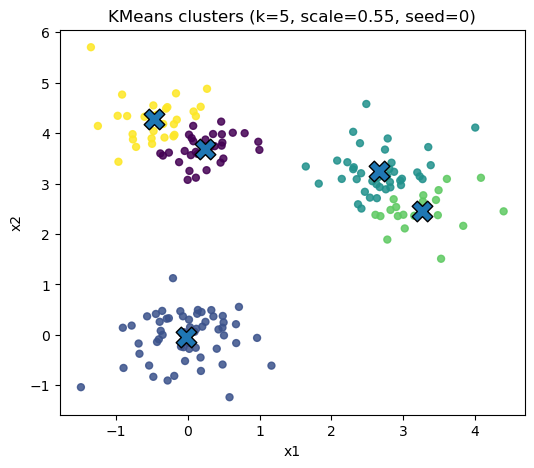


Stability check:
Average center shift (0 → 1): 0.0


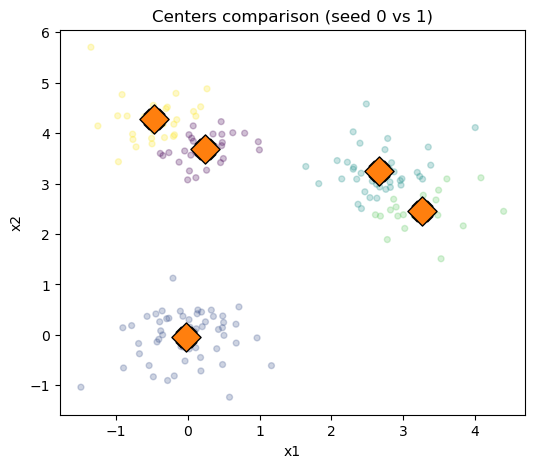


Try:
- Increase scale to overlap clusters (harder problem).
- Change k (n_clusters) and watch the picture change.
- Change seed and observe center movement.


In [2]:
import numpy as np
import matplotlib
# matplotlib.use("Agg")  # headless backend - not needed in jupyter labs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import io, base64

def emit_plot_as_base64_png():
    buf = io.BytesIO()
    plt.savefig(buf, format="png", dpi=140, bbox_inches="tight")
    plt.close()
    buf.seek(0)
    b64 = base64.b64encode(buf.read()).decode("utf-8")
    print("__IMAGE_PNG_BASE64__:" + b64)

# --- Data generation (edit these) ---
rng = np.random.default_rng(1)
scale = 0.55  # try 0.25, 0.9, 1.4
n_per_group = 60

X = np.vstack([
    rng.normal(loc=[0, 0], scale=scale, size=(n_per_group, 2)),
    rng.normal(loc=[3, 3], scale=scale, size=(n_per_group, 2)),
    rng.normal(loc=[0, 4], scale=scale, size=(n_per_group, 2)),
])

# --- Clustering (edit these) ---
n_clusters = 5  # try 2, 3, 4, 5
seed = 0        # try 0, 7, 42

kmeans = KMeans(n_clusters=n_clusters, random_state=seed, n_init=10).fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# --- Print summary ---
unique, counts = np.unique(labels, return_counts=True)
print("Cluster sizes:")
for u, c in zip(unique, counts):
    print(f" Cluster {u}: {c} points")
print("Inertia (lower = tighter clusters):", round(kmeans.inertia_, 2))

# --- Plot 1: clusters + centers ---
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=25, alpha=0.85)
plt.scatter(centers[:, 0], centers[:, 1], s=220, marker="X", edgecolors="black")
plt.title(f"KMeans clusters (k={n_clusters}, scale={scale}, seed={seed})")
plt.xlabel("x1")
plt.ylabel("x2")
# emit_plot_as_base64_png()
plt.show()

# --- Stability check plot: change seed and compare centers ---
seed2 = seed + 1
kmeans2 = KMeans(n_clusters=n_clusters, random_state=seed2, n_init=10).fit(X)
centers2 = kmeans2.cluster_centers_

# --- Crude matching by sorting ---
centers_sorted = centers[np.argsort(centers[:, 0] + centers[:, 1])]
centers2_sorted = centers2[np.argsort(centers2[:, 0] + centers2[:, 1])]
shift = np.linalg.norm(centers_sorted - centers2_sorted, axis=1).mean()
print("\nStability check:")
print(f"Average center shift ({seed} \u2192 {seed2}):", round(float(shift), 3))

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=18, alpha=0.25)
plt.scatter(centers[:, 0], centers[:, 1], s=220, marker="X", edgecolors="black")
plt.scatter(centers2[:, 0], centers2[:, 1], s=220, marker="D", edgecolors="black")
plt.title(f"Centers comparison (seed {seed} vs {seed2})")
plt.xlabel("x1")
plt.ylabel("x2")
# emit_plot_as_base64_png()
plt.show()

print("\nTry:")
print("- Increase scale to overlap clusters (harder problem).")
print("- Change k (n_clusters) and watch the picture change.")
print("- Change seed and observe center movement.")


# C3 - Reinforcement Learning

Learn by taking actions and receiving reward feedback over time

**Definition**  
In reinforcement learning (RL), an agent chooses actions in an environment, receives rewards, and learns a policy that maximizes long-term reward. The defining feature is that actions change future data and future outcomes.

<table style="text-align:left";>
    <tr>
        <th>What you have</th>
        <th>What you want</th>
        <th>Key concepts</th>
        <th>How it's evaluated</th>
        <th>Common pitfalls</th>
    </tr>
    <tr>
        <th>Actions + rewards over time</th>
        <th>Maximize long-term reward</th>
        <th>State, action, reward<br>Policy<br>Exploration vs exploitation</th>
        <th>Cumulative reward <br>Regret vs baseline<br>Safety constraints</th>
        <th>Unsafe exploration<br>Feedback loops<br>Hard-to-debug behavior</th>
    </tr>
</table>

### Microlab - Actions &rarr; Reward Sequence

This lab demonstrates the RL loop without implementing a full RL algorithm.  
An agent chooses actions repeatedly, receives rewards, and accumulates long-term value.  

**Note**: The core difference from supervised learning: the goal is not predicting labels, it is choosing actions over time.

In [8]:
import numpy as np

rng = np.random.default_rng(0)

actions = ["SAFE", "RISKY"]
total_reward = 0.0

print("Action \u2192 Reward sequence:")

for step in range(10):
    # try changing the probabilities to simulate a different policy
    action = rng.choice(actions, p=[0.6, 0.4])

    if action == "SAFE":
        reward = rng.normal(1.0, 0.2)
    else:
        reward = rng.normal(3.0, 2.0)  # higher upside, higher downside

    total_reward += reward
    print(f"Step {step+1}: Action+{action}, Reward={reward:.2f}")

print("\nTotal accumulated reward:", round(total_reward, 2))

print("\nKey idea:")
print("- RL is about choosing actions, not predicting labels.")
print("- Performace is long-term (cumulative reward).")
print("nTry:")
print("- Change p=[0.6, 0.4] to p=[0.9, 0.1] or p=[0.2, 0.8]")
print("- See how risk changes outcomes")

Action → Reward sequence:
Step 1: Action+RISKY, Reward=2.74
Step 2: Action+SAFE, Reward=1.02
Step 3: Action+RISKY, Reward=3.72
Step 4: Action+RISKY, Reward=4.89
Step 5: Action+SAFE, Reward=0.75
Step 6: Action+RISKY, Reward=3.08
Step 7: Action+RISKY, Reward=2.56
Step 8: Action+RISKY, Reward=1.54
Step 9: Action+RISKY, Reward=2.37
Step 10: Action+SAFE, Reward=1.21

Total accumulated reward: 23.88

Key idea:
- RL is about choosing actions, not predicting labels.
- Performace is long-term (cumulative reward).
nTry:
- Change p=[0.6, 0.4] to p=[0.9, 0.1] or p=[0.2, 0.8]
- See how risk changes outcomes


# D - Ethics and Responsibility

Ethics in data science is not about intentions, it is about **impact**. Models influence decisions that affect real people, often at scale, and small technical choices can create large downstream effects.

This section explores how bias enters systems, why fairness is a design choice rather than a single formula, and why accuracy alone does not guarantee responsible behavior.

## D1 - Bias and Representation

Models learn patterns from data, including its gaps and distortions.  

In data science **bias** usually refers to systematic distortion, not personal prejudice. A model can behave unfairly even if no one involved intended harm

<table style="text-align:left;">
    <tr>
        <th>Source</th>
        <th>Description</th>
        <th>Example</th>
    </tr>

</table>
